# Prinsip Maksimum Pontryagin

In [ ]:
from IPython.display import display
import sympy as sp
from sympy.printing.mathml import mathml

In [ ]:
#Mendefinisikan Parameter dan Kompartemen yang Terlibat
S, E, I, R, u1, u2 = sp.symbols("S, E, I, R, u1, u2", cls = sp.Function)
LAMBDA, alpha, beta, mu, gamma, theta = sp.symbols("LAMBDA, alpha, beta, mu, gamma, theta")
A1, A2, A3, t, J = sp.symbols("A1, A2, A3, t, J")

t0 = 0
tf = 400

#Pendefinisian Fungsi Objektif
def obj():
  return A1*I(t) + A2*u1(t)**2 + A3*u2(t)**2

def dS():
  return LAMBDA - alpha*S(t)*(theta*(1 - u1(t))*E(t) + (1 - theta)*I(t)) - mu*S(t)
def dE():
  return alpha*S(t)*(theta*(1 - u1(t))*E(t) + (1 - theta)*I(t)) - (mu + beta)*E(t)
def dI():
  return beta*E(t) - (mu + gamma*(1 + u2(t)))*I(t)
def dR():
  return gamma*(1 + u2(t))*I(t) - mu*R(t)

display(sp.Eq(J, sp.Integral(obj(), (t, t0, tf))))
display(sp.Eq(S(t).diff(t), dS()))
display(sp.Eq(E(t).diff(t), dE()))
display(sp.Eq(I(t).diff(t), dI()))
display(sp.Eq(R(t).diff(t), dR()))

Eq(J, Integral(A1*I(t) + A2*u1(t)**2 + A3*u2(t)**2, (t, 0, 400)))

Eq(Derivative(S(t), t), LAMBDA - alpha*(theta*(1 - u1(t))*E(t) + (1 - theta)*I(t))*S(t) - mu*S(t))

Eq(Derivative(E(t), t), alpha*(theta*(1 - u1(t))*E(t) + (1 - theta)*I(t))*S(t) - (beta + mu)*E(t))

Eq(Derivative(I(t), t), beta*E(t) - (gamma*(u2(t) + 1) + mu)*I(t))

Eq(Derivative(R(t), t), gamma*(u2(t) + 1)*I(t) - mu*R(t))

In [ ]:
#Membuat Fungsi Hamiltonian
L1, L2, L3, L4, Hamiltonian = sp.symbols("L1, L2, L3, L4, H", cls = sp.Function)
L1diff, L2diff, L3diff, L4diff = sp.symbols("Ldot_1, Ldot_2, Ldot_3, Ldot_4")
display(sp.Eq(Hamiltonian(t), obj() + L1(t)*dS() + L2(t)*dE() + L3(t)*dI() + L4(t)*dR()))

Hamiltonian = obj() + L1(t)*dS() + L2(t)*dE() + L3(t)*dI() + L4(t)*dR()

Eq(H(t), A1*I(t) + A2*u1(t)**2 + A3*u2(t)**2 + (beta*E(t) - (gamma*(u2(t) + 1) + mu)*I(t))*L3(t) + (alpha*(theta*(1 - u1(t))*E(t) + (1 - theta)*I(t))*S(t) - (beta + mu)*E(t))*L2(t) + (gamma*(u2(t) + 1)*I(t) - mu*R(t))*L4(t) + (LAMBDA - alpha*(theta*(1 - u1(t))*E(t) + (1 - theta)*I(t))*S(t) - mu*S(t))*L1(t))

In [ ]:
#Persamaan Adjoin
display(sp.Eq(L1diff, -1*sp.diff(Hamiltonian, S(t))))
L1diff = -1*sp.diff(Hamiltonian, S(t))
display(sp.Eq(L2diff, -1*sp.diff(Hamiltonian, E(t))))
L2diff = -1*sp.diff(Hamiltonian, E(t))
display(sp.Eq(L3diff, -1*sp.diff(Hamiltonian, I(t))))
L3diff = -1*sp.diff(Hamiltonian, I(t))
display(sp.Eq(L4diff, -1*sp.diff(Hamiltonian, R(t))))
L4diff = -1*sp.diff(Hamiltonian, R(t))

Eq(Ldot_1, -alpha*(theta*(1 - u1(t))*E(t) + (1 - theta)*I(t))*L2(t) - (-alpha*(theta*(1 - u1(t))*E(t) + (1 - theta)*I(t)) - mu)*L1(t))

Eq(Ldot_2, alpha*theta*(1 - u1(t))*L1(t)*S(t) - beta*L3(t) - (alpha*theta*(1 - u1(t))*S(t) - beta - mu)*L2(t))

Eq(Ldot_3, -A1 + alpha*(1 - theta)*L1(t)*S(t) - alpha*(1 - theta)*L2(t)*S(t) - gamma*(u2(t) + 1)*L4(t) - (-gamma*(u2(t) + 1) - mu)*L3(t))

Eq(Ldot_4, mu*L4(t))

In [ ]:
#Printing Persamaan Adjoin
print(L1diff)
print(L2diff)
print(L3diff)
print(L4diff)

-alpha*(theta*(1 - u1(t))*E(t) + (1 - theta)*I(t))*L2(t) - (-alpha*(theta*(1 - u1(t))*E(t) + (1 - theta)*I(t)) - mu)*L1(t)
alpha*theta*(1 - u1(t))*L1(t)*S(t) - beta*L3(t) - (alpha*theta*(1 - u1(t))*S(t) - beta - mu)*L2(t)
-A1 + alpha*(1 - theta)*L1(t)*S(t) - alpha*(1 - theta)*L2(t)*S(t) - gamma*(u2(t) + 1)*L4(t) - (-gamma*(u2(t) + 1) - mu)*L3(t)
mu*L4(t)


In [ ]:
display(sp.diff(sp.diff(Hamiltonian,u1(t)),u1(t)))
display(sp.diff(sp.diff(Hamiltonian,u2(t)),u2(t)))

2*A2

2*A3

In [ ]:
display(sp.diff(Hamiltonian,u1(t)))
display(sp.diff(Hamiltonian,u2(t)))

2*A2*u1(t) + alpha*theta*E(t)*L1(t)*S(t) - alpha*theta*E(t)*L2(t)*S(t)

2*A3*u2(t) - gamma*I(t)*L3(t) + gamma*I(t)*L4(t)

In [ ]:
display(sp.Eq(u1(t), sp.solve(sp.diff(Hamiltonian,u1(t)),u1(t))[0]))
display(sp.Eq(u2(t), sp.solve(sp.diff(Hamiltonian,u2(t)),u2(t))[0]))

Eq(u1(t), alpha*theta*(-L1(t) + L2(t))*E(t)*S(t)/(2*A2))

Eq(u2(t), gamma*(L3(t) - L4(t))*I(t)/(2*A3))

In [ ]:
print(sp.solve(sp.diff(Hamiltonian,u1(t)),u1(t))[0])
print(sp.solve(sp.diff(Hamiltonian,u2(t)),u2(t))[0])

alpha*theta*(-L1(t) + L2(t))*E(t)*S(t)/(2*A2)
gamma*(L3(t) - L4(t))*I(t)/(2*A3)


# Simulasi Numerik tanpa Kontrol

In [ ]:
import sys
sys.modules[__name__].__dict__.clear()
from scipy.integrate import odeint, RK45, solve_ivp #ODE Solver
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [ ]:
#Model Parameter
LAMBDA = 0.1374
alpha = 0.0012
beta = 0.0239
gamma = 0.0239
mu = 0.0128
theta = 0.75

InitS = 1283
InitE = 78
InitI = 172
InitR = 124

#Nilai Bobot Kontrol
A1 = 1
A2 = 100
A3 = 100

#Set up fOR Forward-Backward Sweep Method
test = -1 #Test variable; as long as variable is negative the while loops keeps repeating
t0 = 0 #Initial time
tf = 400 #Final time
deltaa = 0.00001 #Accepted tollerance
M = (10*tf)-1 #Number of nodes
t = np.linspace(t0,tf,M+1) #Time variable where linspace creates M+1 equally spaced nodes between t0 and tf, including t0 and tf.
h = tf/M #Spacing between nodes
h2 = h/2;

In [ ]:
#Kondisi Awal Model
S = np.zeros((1, M+1), dtype = float)[0]
E = np.zeros((1, M+1), dtype = float)[0]
I = np.zeros((1, M+1), dtype = float)[0]
R = np.zeros((1, M+1), dtype = float)[0]

S[0] = InitS
E[0] = InitE
I[0] = InitI
R[0] = InitR

loopcnt = 0 #Menghitung Jumlah Looping
for lp in range (M):

  oldS = S;
  oldE = E;
  oldI = I;
  oldR = R;

  #Model
  for i in range (0,M):

    m11 = LAMBDA - alpha*S[i]*(E[i] + I[i]) - mu*S[i]
    m12 = alpha*S[i]*(E[i] + I[i]) - (mu + beta)*E[i]
    m13 = beta*E[i] - (mu + gamma)*I[i]
    m14 = gamma*I[i] - mu*R[i]

    S[i+1] = S[i] + h*m11
    E[i+1] = E[i] + h*m12
    I[i+1] = I[i] + h*m13
    R[i+1] = R[i] + h*m14

  S0 = S
  E0 = E
  I0 = I
  R0 = R

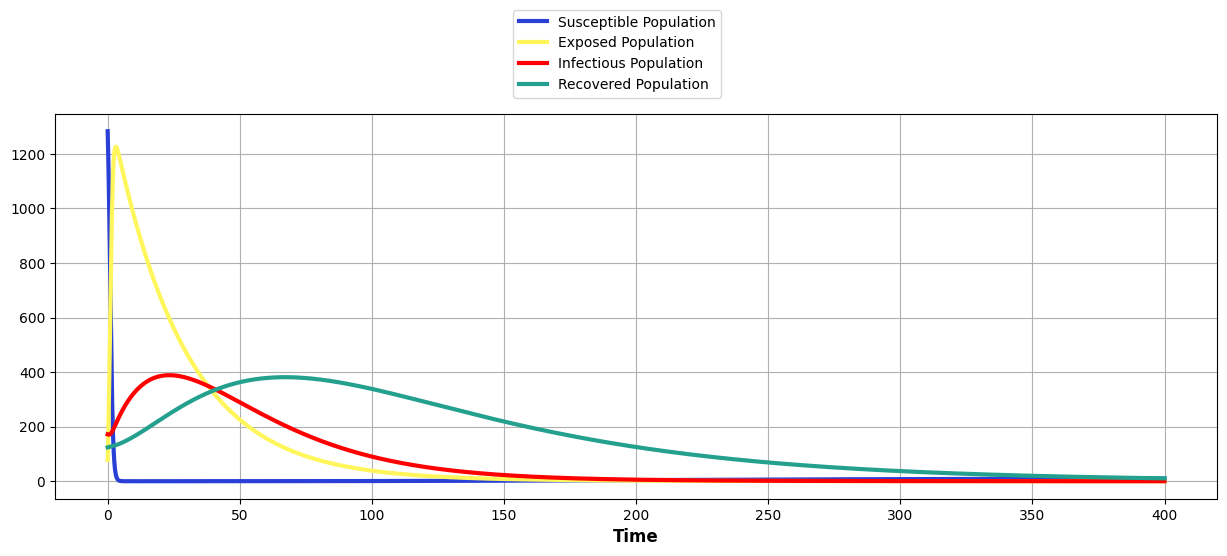

In [ ]:
from matplotlib.ticker import MaxNLocator

plt.figure(figsize = (15,5))
plt.plot(t, S0, color = '#2940d7', ls = '-', label = 'Susceptible Population', linewidth = 3)
plt.plot(t, E0, color = '#fef65b', ls = '-', label = 'Exposed Population', linewidth = 3)
plt.plot(t, I0, color = '#ff0000', ls = '-', label = 'Infectious Population', linewidth = 3)
plt.plot(t, R0, color = '#23a08e', ls = '-', label = 'Recovered Population', linewidth = 3)
plt.xlabel('Time', fontweight = 'bold', fontsize=12)
plt.legend(bbox_to_anchor=(0.5, 1), loc='center', bbox_transform=plt.gcf().transFigure)
plt.grid()
plt.show()

# Simulasi Numerik dengan Kontrol

In [ ]:
#Kondisi Awal Model
S = np.zeros((1, M+1), dtype = float)[0]
E = np.zeros((1, M+1), dtype = float)[0]
I = np.zeros((1, M+1), dtype = float)[0]
R = np.zeros((1, M+1), dtype = float)[0]

S[0] = InitS
E[0] = InitE
I[0] = InitI
R[0] = InitR

#Kondisi Awal Input Kontrol Optimal
u1 = np.zeros((1, M+1), dtype = float)[0]
u2 = np.zeros((1, M+1), dtype = float)[0]

#Kondisi Awal Fungsi Adjoin
L1 = np.zeros((1, M+1), dtype = float)[0]
L2 = np.zeros((1, M+1), dtype = float)[0]
L3 = np.zeros((1, M+1), dtype = float)[0]
L4 = np.zeros((1, M+1), dtype = float)[0]

L1[M] = 0
L2[M] = 0
L3[M] = 0
L4[M] = 0

#Metode Sweep Maju-Mundur
for loop in range(M):

  oldu1 = u1;
  oldu2 = u2;

  oldS = S;
  oldE = E;
  oldI = I;
  oldR = R;

  oldL1 = L1;
  oldL2 = L2;
  oldL3 = L3;
  oldL4 = L4;

  #Model
  for i in range (0,M):

    m11 = LAMBDA - alpha*S[i]*(theta*(1 - u1[i])*E[i] + (1 - theta)*I[i]) - mu*S[i]
    m12 = alpha*S[i]*(theta*(1 - u1[i])*E[i] + (1 - theta)*I[i]) - (mu + beta)*E[i]
    m13 = beta*E[i] - (mu + gamma*(1 + u2[i]))*I[i]
    m14 = gamma*(1 + u2[i])*I[i] - mu*R[i]

    S[i+1] = S[i] + h*m11
    E[i+1] = E[i] + h*m12
    I[i+1] = I[i] + h*m13
    R[i+1] = R[i] + h*m14

  #Persamaan Adjoin
  for i in range (0,M):
    j = M - i;

    n11 = -alpha*(theta*(1 - u1[j])*E[j] + (1 - theta)*I[j])*L2[j] - (-alpha*(theta*(1 - u1[j])*E[j] + (1 - theta)*I[j]) - mu)*L1[j]
    n12 = alpha*theta*(1 - u1[j])*L1[j]*S[j] - beta*L3[j] - (alpha*theta*(1 - u1[j])*S[j] - beta - mu)*L2[j]
    n13 = -A1 + alpha*(1 - theta)*L1[j]*S[j] - alpha*(1 - theta)*L2[j]*S[j] - gamma*(u2[j] + 1)*L4[j] - (-gamma*(u2[j] + 1) - mu)*L3[j]
    n14 = mu*L4[j]

    L1[j-1] = L1[j] - h*n11
    L2[j-1] = L2[j] - h*n12
    L3[j-1] = L3[j] - h*n13
    L4[j-1] = L4[j] - h*n14

  #Kondisi Optimal
  for k in range (0,M):
    u1[k] = min(1, max(0, (alpha*theta*(-L1[k] + L2[k])*E[k]*S[k]/(2*A2))))
    u2[k] = min(1, max(0, (gamma*(L3[k] - L4[k])*I[k]/(2*A3))))

  #Cek Konvergensi Solusi
  tempu1 = deltaa*sum(abs(u1)) - sum(abs(oldu1 - u1))
  tempu2 = deltaa*sum(abs(u2)) - sum(abs(oldu2 - u1))

  tempS = deltaa*sum(abs(S)) - sum(abs(oldS - S))
  tempE = deltaa*sum(abs(E)) - sum(abs(oldE - E))
  tempI = deltaa*sum(abs(I)) - sum(abs(oldI - I))
  tempR = deltaa*sum(abs(R)) - sum(abs(oldR - R))

  tempL1 = deltaa*sum(abs(L1)) - sum(abs(oldL1 - L1))
  tempL2 = deltaa*sum(abs(L2)) - sum(abs(oldL2 - L2))
  tempL3 = deltaa*sum(abs(L3)) - sum(abs(oldL3 - L3))
  tempL4 = deltaa*sum(abs(L4)) - sum(abs(oldL4 - L4))

S1 = S
E1 = E
I1 = I
R1 = R

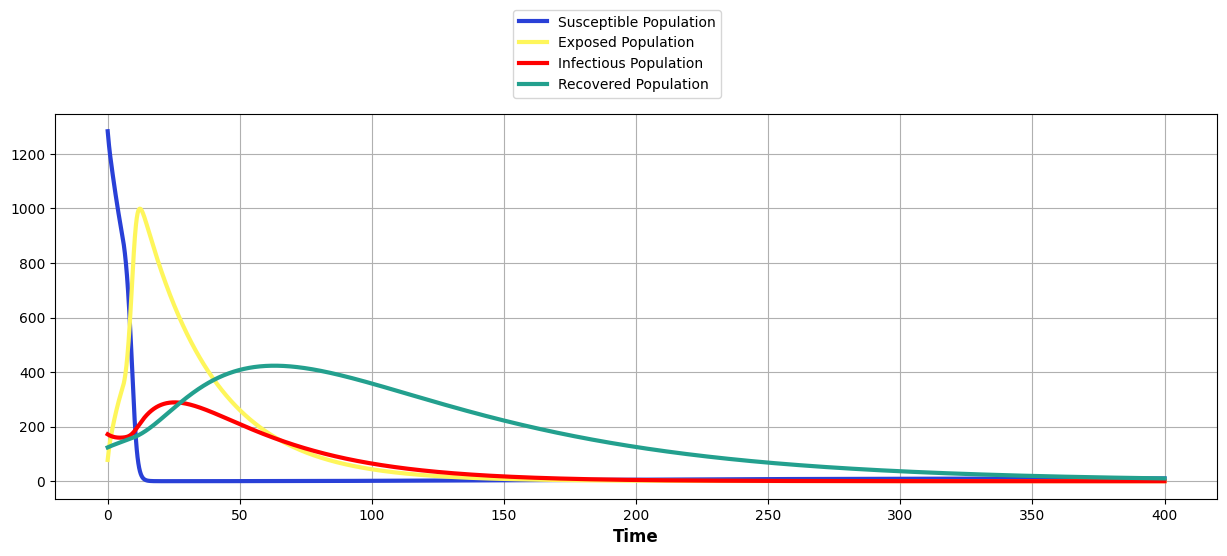

In [ ]:
from matplotlib.ticker import MaxNLocator

plt.figure(figsize = (15,5))
plt.plot(t, S1, color = '#2940d7', ls = '-', label = 'Susceptible Population', linewidth = 3)
plt.plot(t, E1, color = '#fef65b', ls = '-', label = 'Exposed Population', linewidth = 3)
plt.plot(t, I1, color = '#ff0000', ls = '-', label = 'Infectious Population', linewidth = 3)
plt.plot(t, R1, color = '#23a08e', ls = '-', label = 'Recovered Population', linewidth = 3)
plt.xlabel('Time', fontweight = 'bold', fontsize=12)
plt.legend(bbox_to_anchor=(0.5, 1), loc='center', bbox_transform=plt.gcf().transFigure)
plt.grid()
plt.show()

# Perbandingan dengan Kontrol dan Tanpa Kontrol

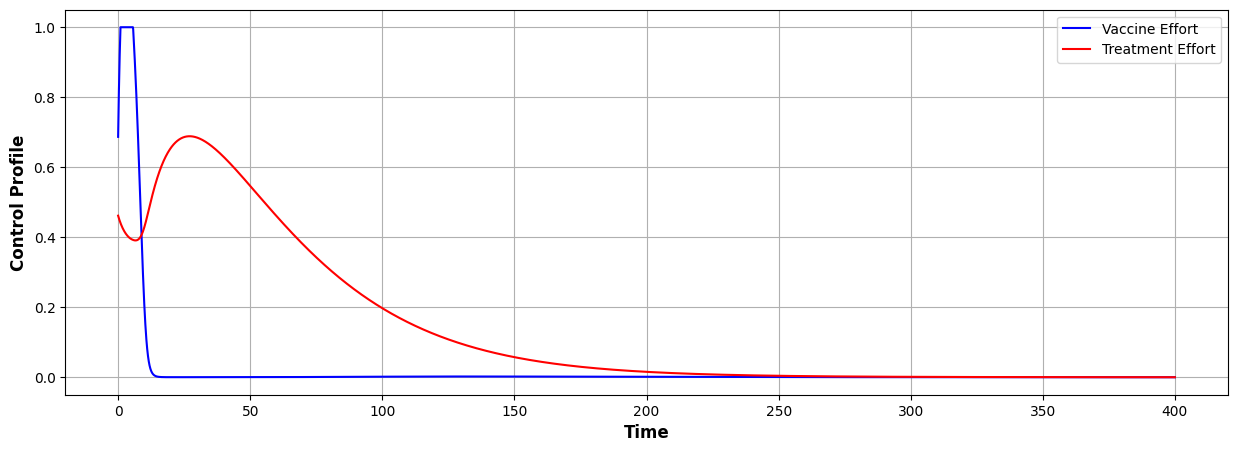

In [ ]:
plt.figure(figsize=(15,5))
plt.plot(t, u1, color='blue', ls='-', label='Vaccine Effort')
plt.plot(t, u2, color='red', ls='-', label='Treatment Effort')
plt.xlabel('Time', fontweight='bold', fontsize=12)
plt.ylabel('Control Profile', fontweight='bold', fontsize=12)
plt.legend()
plt.grid()
plt.show()

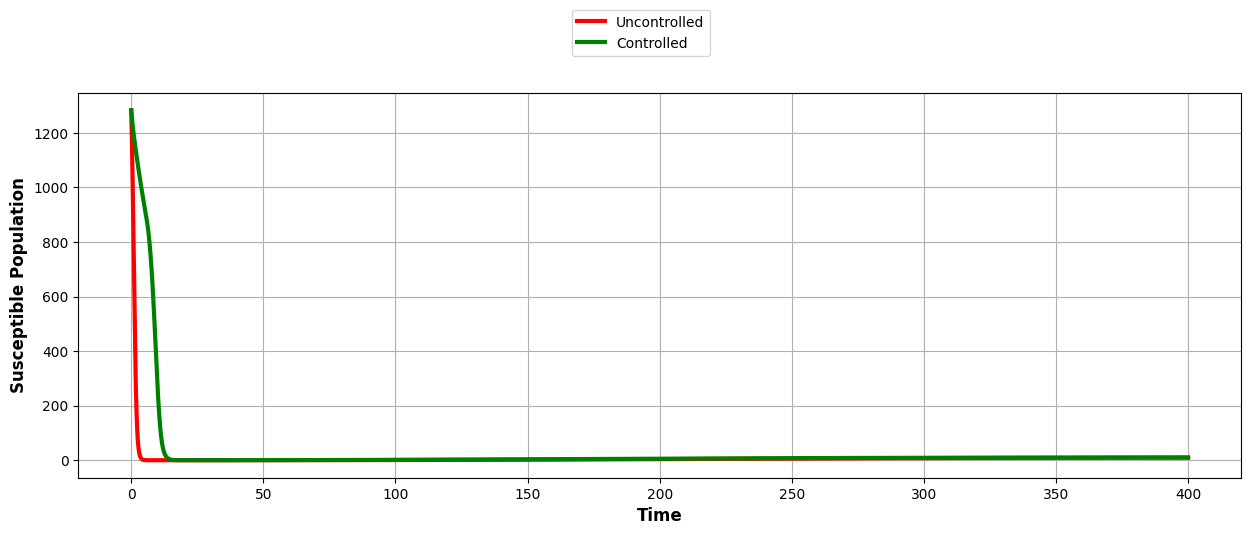

In [ ]:
from matplotlib.ticker import MaxNLocator

plt.figure(figsize = (15,5))
plt.plot(t, S0, color = 'red', ls = '-', label = 'Uncontrolled', linewidth = 3)
plt.plot(t, S1, color = 'green', ls = '-', label = 'Controlled', linewidth = 3)
plt.xlabel('Time', fontweight = 'bold', fontsize=12)
plt.ylabel('Susceptible Population', fontweight = 'bold', fontsize=12)
plt.legend(bbox_to_anchor=(0.5, 1), loc='center', bbox_transform=plt.gcf().transFigure)
plt.grid()
plt.show()

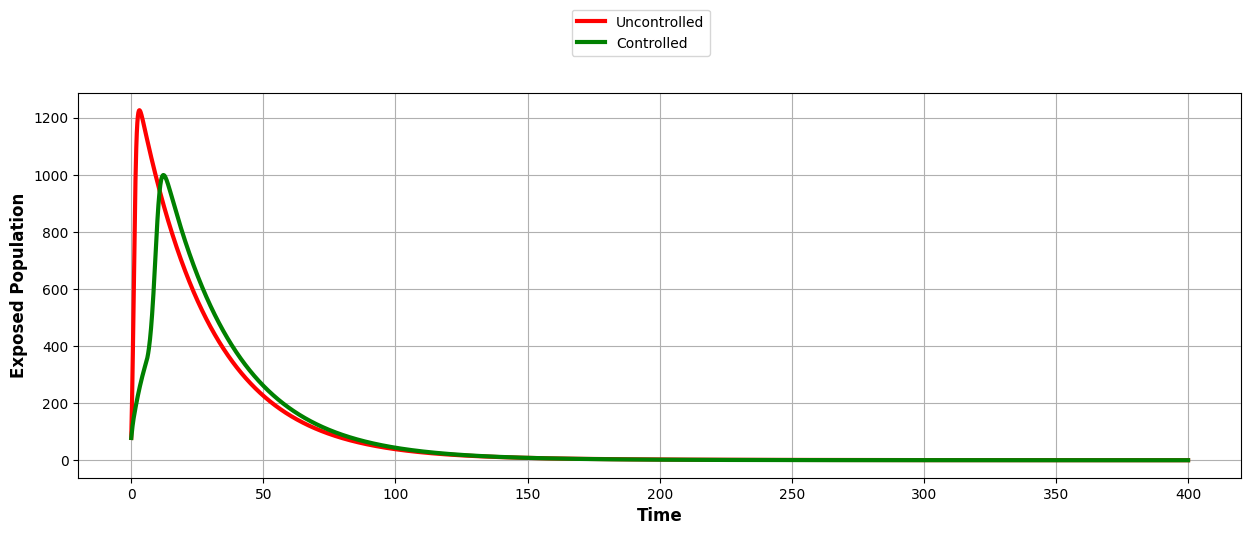

In [ ]:
from matplotlib.ticker import MaxNLocator

plt.figure(figsize = (15,5))
plt.plot(t, E0, color = 'red', ls = '-', label = 'Uncontrolled', linewidth = 3)
plt.plot(t, E1, color = 'green', ls = '-', label = 'Controlled', linewidth = 3)
plt.xlabel('Time', fontweight = 'bold', fontsize=12)
plt.ylabel('Exposed Population', fontweight = 'bold', fontsize=12)
plt.legend(bbox_to_anchor=(0.5, 1), loc='center', bbox_transform=plt.gcf().transFigure)
plt.grid()
plt.show()

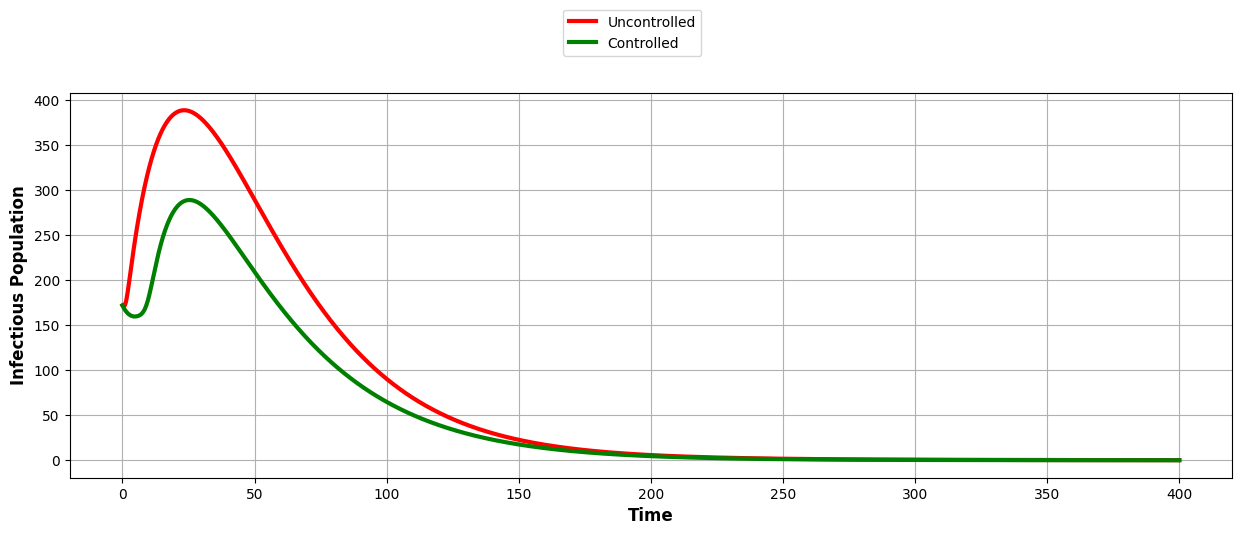

In [ ]:
from matplotlib.ticker import MaxNLocator

plt.figure(figsize = (15,5))
plt.plot(t, I0, color = 'red', ls = '-', label = 'Uncontrolled', linewidth = 3)
plt.plot(t, I1, color = 'green', ls = '-', label = 'Controlled', linewidth = 3)
plt.xlabel('Time', fontweight = 'bold', fontsize=12)
plt.ylabel('Infectious Population', fontweight = 'bold', fontsize=12)
plt.legend(bbox_to_anchor=(0.5, 1), loc='center', bbox_transform=plt.gcf().transFigure)
plt.grid()
plt.show()

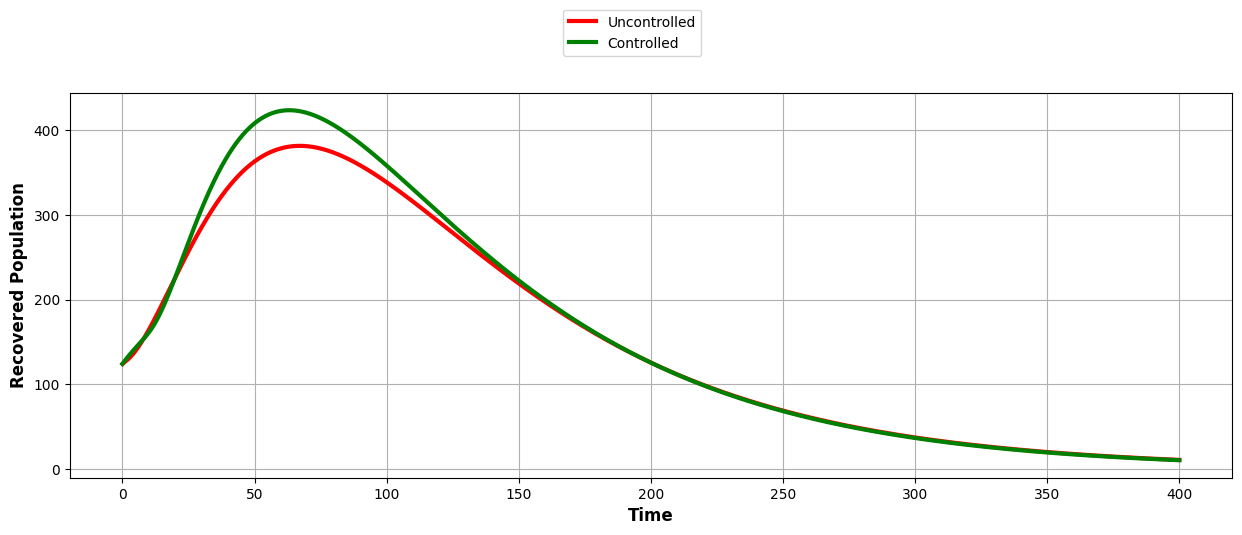

In [ ]:
from matplotlib.ticker import MaxNLocator

plt.figure(figsize = (15,5))
plt.plot(t, R0, color = 'red', ls = '-', label = 'Uncontrolled', linewidth = 3)
plt.plot(t, R1, color = 'green', ls = '-', label = 'Controlled', linewidth = 3)
plt.xlabel('Time', fontweight = 'bold', fontsize=12)
plt.ylabel('Recovered Population', fontweight = 'bold', fontsize=12)
plt.legend(bbox_to_anchor=(0.5, 1), loc='center', bbox_transform=plt.gcf().transFigure)
plt.grid()
plt.show()